In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Logistic function

$$f(x)=\dfrac{L}{1+e^{-k\left(x-x_{0}\right)}}$$

$x_{0}$, the ${\displaystyle x}$ value of the sigmoid's midpoint;

${\displaystyle L}$, the curve's maximum value;

${\displaystyle k}$, the logistic growth rate or 
steepness of the curve

Text(0.5, 0.95, '$f(x)=\\dfrac{L}{1+e^{-3(x-x_0)}}$')

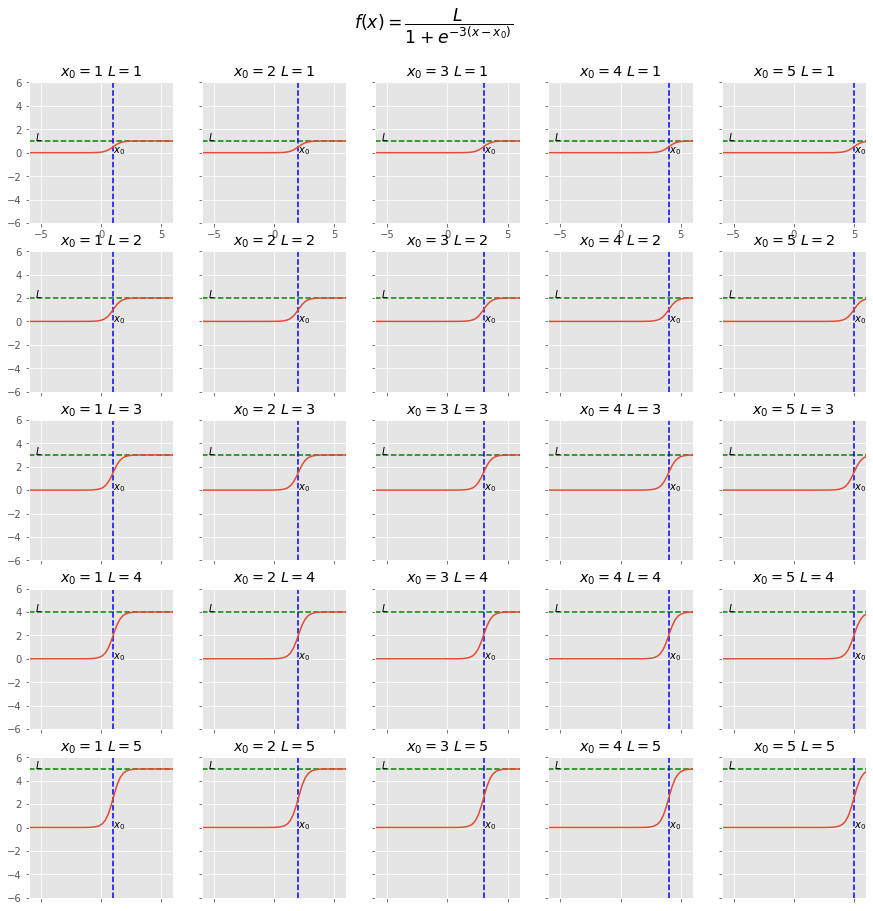

In [ ]:
def logistic(x, x0, L, k=3):
    return L/(1+np.exp(-k*(x-x0)))
log_v = np.vectorize(logistic)


fig = plt.figure(figsize=(15, 15))
fig.tight_layout()
gs = fig.add_gridspec(5, 5)

def plot_logistic(ax, x0, L):
    x = np.linspace(-6, 6)
    ax.plot(x, log_v(x, x0, L))
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)

    ax.hlines(L, *ax.get_ylim(), color='green', linestyles='dashed')
    ax.annotate("$L$", (-5.5, L))
    
    ax.vlines(x0, *ax.get_xlim(), color='blue', linestyles='dashed')
    ax.annotate("$x_0$", (x0, 0))
    ax.set_title(f"$x_0={x0}$ $L={L}$")

vals = [1, 2, 3, 4, 5]
for i, L in enumerate(vals):
    for j, x0 in enumerate(vals):
        ax = fig.add_subplot(gs[i, j])
        if (i!=0):
            ax.set_xticklabels([])
        if (j!=0):
            ax.set_yticklabels([])            

        plot_logistic(ax, x0, L)
fig.suptitle("$f(x)=\dfrac{L}{1+e^{-3(x-x_0)}}$",x = 0.5, y=0.95, fontsize='xx-large')
# fig.savefig('test.png')


## Exponential

In [ ]:
import sympy 

In [ ]:
x0 = np.linspace(1e-10, 2, 100)
y0 = np.exp(x0)
x1 = np.linspace(1e-10, 2, 100)
y1 = np.log(x1)

Text(0.5, 1.0, '$\\log{x}$')

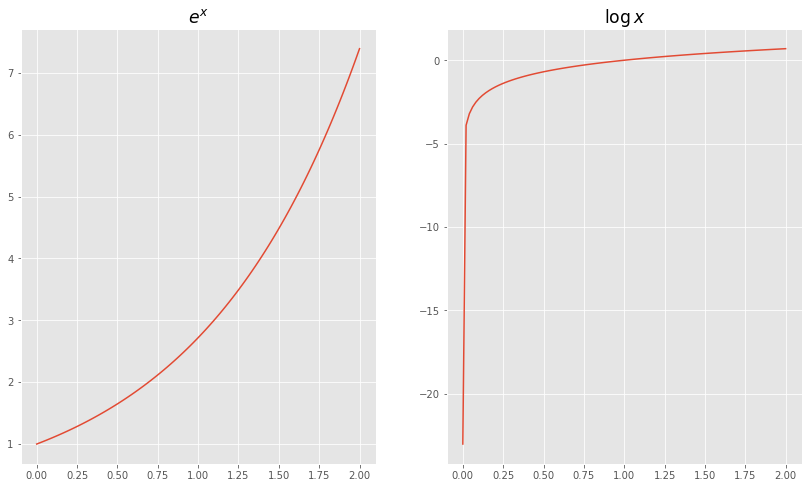

In [ ]:
fig = plt.figure(figsize=(14, 8))
gs = fig.add_gridspec(1, 2)
ax = fig.add_subplot(gs[0, 0])
ax.plot(x0, y0)
ax.set_title("$e^x$", fontsize='xx-large')

ax = fig.add_subplot(gs[0, 1])
ax.plot(x1, y1)
ax.set_title("$\log{x}$", fontsize='xx-large')

## SoftMax

* commonly used activation function. 
* takes in a vector of real numbers
* maps them to values between $[0, 1)$
* the sum of the output vector is 1
* the intuition is 

### some intuition

* suppose the original vector is [1, 2, 3, 4, 5].
* if we make this a probability distribution by dividing by the sum, we'd get

In [ ]:
x = np.array([1, 2, 3, 4, 5])

In [ ]:
x / x.sum()

array([0.06666667, 0.13333333, 0.2       , 0.26666667, 0.33333333])

In [ ]:
y = (np.exp(x) / np.exp(x).sum())

(array([7.5, 0. , 7.5, 0. , 0. , 7.5, 0. , 7.5, 0. , 7.5]),
 array([0.06666667, 0.09333333, 0.12      , 0.14666667, 0.17333333,
        0.2       , 0.22666667, 0.25333333, 0.28      , 0.30666667,
        0.33333333]),
 <BarContainer object of 10 artists>)

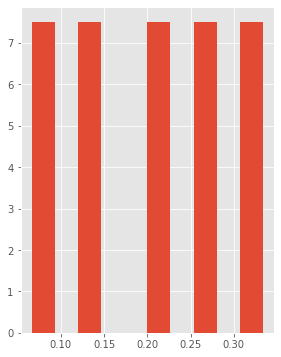

In [ ]:
fig = plt.figure(figsize=(10, 6))
fig.clf()
gs = fig.add_gridspec(1, 2)
ax = fig.add_subplot(gs[0, 0])
ax.hist(x/x.sum(), density=True)
